# Load MNIST Dataset and build a Deep Learning Model.

### Things to be done:
    1- Load the MNIST Data
    2- Divide the data into train and test sets
    3- Plot the first 10 images using imshow()
    4- Convert images to categorical format
    5- Create a sequential model
    6- Plot the model summary
    7- Plot the architecture of the model with its layer shapes
    8- Compile the model
    9- Fit the model with 20 epochs (as per your desktop configuration)
    10- Plot Training and Testing Loss
    11- Save the model in .h5 extension
    12- Load the model
    13- Test the model

In [1]:
#importing the necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#### Loads the MNIST dataset, splitting it into training and testing sets

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# Display the shape of the x_train array
print(x_train.shape)

(60000, 28, 28)


In [4]:
# Display the shape of the y_test array
print(y_test.shape)

(10000,)


### Plot the first 10 images using imshow()

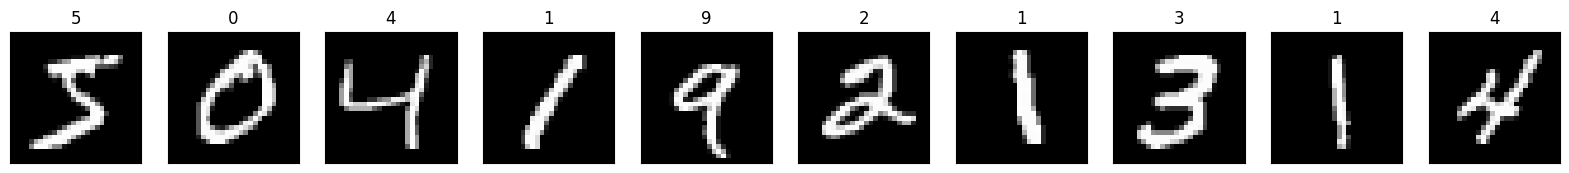

In [5]:
fig, axes = plt.subplots(ncols=10, sharex=False, sharey=True, figsize= (20,4))
for i in range(10):
    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)

plt.show()

#### Convert the labels to one-hot encoded format for multi-class classification

In [6]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [8]:
print(y_test)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [9]:
print(y_test.shape)

(10000, 10)


#### Defines a sequential model with a flattening layer and dense layers using ReLU and softmax activations.

In [10]:
# Define a Sequential model, which allows adding layers sequentially
model = Sequential([
    Flatten(input_shape = (28,28)), # Add a Flatten layer to convert the 28x28 input images into a 1D array
    Dense(128, activation='relu'),  # First hidden layer with 128 neurons and ReLU as activation function
    Dense(64, activation='relu'),   # Second Hidden layer with 64 neurons and ReLU as activation function
    
# Add the output layer with 10 neurons (one for each class) and 'softmax' activation function
# Softmax is used for multi-class classification to output probabilities for each class
    Dense(10, activation='softmax')
])

#### Display a summary of the model architecture, including the number of parameters in each layer

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Plot the architecture of the model with its layer shapes

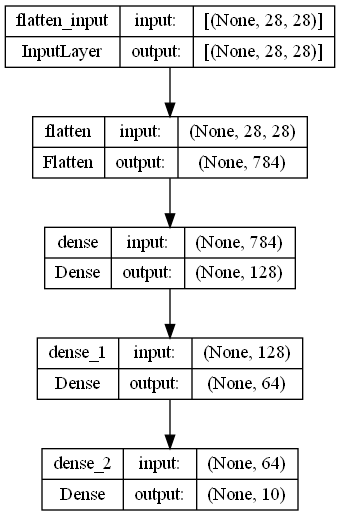

In [12]:
from tensorflow.keras import utils
# Visualize the architecture of the model with its layer shapes
utils.plot_model(model, show_shapes=True)

### Complie the Model

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

### Fit the model with 20 epochs

In [15]:
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20


1875/1875 [==============================] - 5s 2ms/step - loss: 1.6778 - acc: 0.8570 - val_loss: 0.3476 - val_acc: 0.9098
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2938 - acc: 0.9231 - val_loss: 0.2506 - val_acc: 0.9331
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2036 - acc: 0.9448 - val_loss: 0.1903 - val_acc: 0.9449
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1699 - acc: 0.9527 - val_loss: 0.1507 - val_acc: 0.9616
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1431 - acc: 0.9602 - val_loss: 0.1624 - val_acc: 0.9577
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1260 - acc: 0.9651 - val_loss: 0.1634 - val_acc: 0.9567
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1075 - acc: 0.9695 - val_loss: 0.1686 - val_acc: 0.9571
Epoch 8/20
1875/1875 [==============================] - 4s 2

### Plot Training and Testing Loss

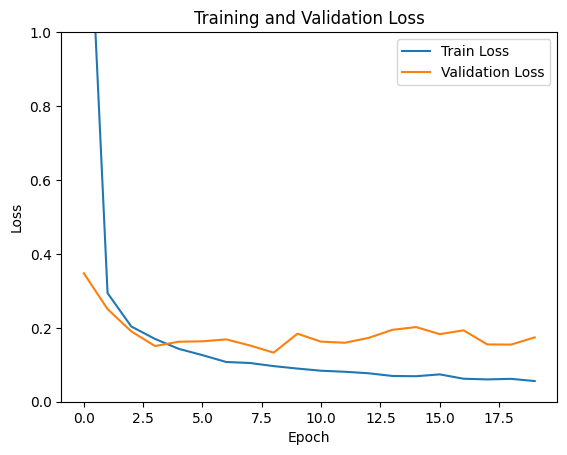

In [16]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

### Save the model in .h5 extension

In [18]:
# Saving the trained model to a file 
model.save('mnist_model1.h5')